# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,562,113,53,93,197,62,11,216,31,24,165,221,688,196,72,6,25,188,199
1,241,93,45,73,164,59,7,159,42,20,146,182,379,188,65,11,15,195,201
2,196,107,56,104,231,71,11,219,31,25,172,226,705,217,71,19,11,189,196
3,574,104,55,105,216,68,11,205,32,23,169,221,623,216,71,9,18,189,196
4,18,104,54,100,186,61,10,216,31,24,173,225,686,220,74,5,11,185,195
5,194,92,37,86,167,60,7,158,42,20,131,181,373,144,68,9,21,190,196
6,703,93,43,78,162,64,8,137,48,18,145,156,281,159,63,17,12,203,210
7,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
8,181,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185
9,230,85,35,47,110,55,3,117,57,17,122,136,203,139,89,5,9,180,184


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.089253,93.797814,44.863388,82.504554,169.225865,61.593807,8.517304,169.349727,40.806922,20.612022,148.025501,188.803279,442.335155,174.204007,72.220401,6.282332,13.029144,189.021858,195.721311
std,244.500827,8.322487,6.225207,15.671074,32.714648,7.209890,4.271593,33.130048,7.819535,2.576693,14.557941,30.763780,176.043813,32.482257,7.164431,4.796828,8.974775,6.078222,7.418211
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,210.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,149.000000,67.000000,2.000000,6.000000,185.000000,190.000000
50%,421.000000,93.000000,44.000000,81.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,627.000000,100.000000,49.000000,98.000000,197.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,589.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,59.000000,110.000000,306.000000,126.000000,55.000000,265.000000,61.000000,29.000000,186.000000,287.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,204.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
### YOUR CODE HERE


# первая колонка содержит идущие подряд числа, просто индексы
X_train = X_train[:, 1:]
X_test  = X_test[:, 1:]
print(X_train.shape, X_test.shape)

# в выборке есть столбцы как со средним порядка 200, так и 10. min, max тоже сильно различаются
# есть смысл нормализовать данные
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test  = (X_test  - mean) / std


(549, 18) (297, 18)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
### YOUR CODE HERE  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500
)

c_values = [0.01, 0.1, 1, 10, 100]
param_grid = {'C': c_values, "penalty": ['l2', 'l1']}
grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                      
)
grid.fit(X_train, y_train)

print("Параметр регуляризации:", grid.best_params_["C"])
print("Регуляризация:", grid.best_params_['penalty'])

Параметр регуляризации: 10
Регуляризация: l1


In [9]:
from sklearn.metrics import accuracy_score, f1_score

model = grid.best_estimator_

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", acc)
print("F1 score:", f1)

Accuracy: 0.8047138047138047
F1 score: 0.8025486833413583


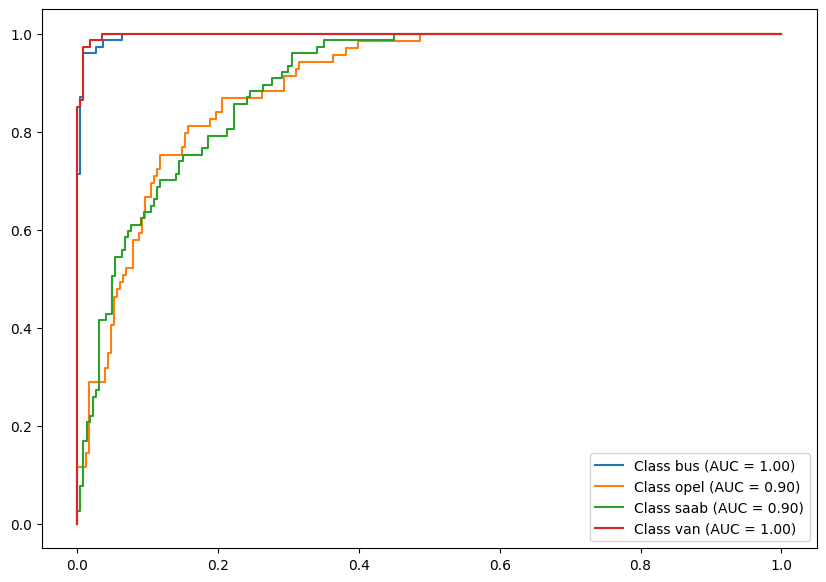

In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot(не работает с python3.11)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_proba = model.predict_proba(X_test)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")


plt.legend()
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

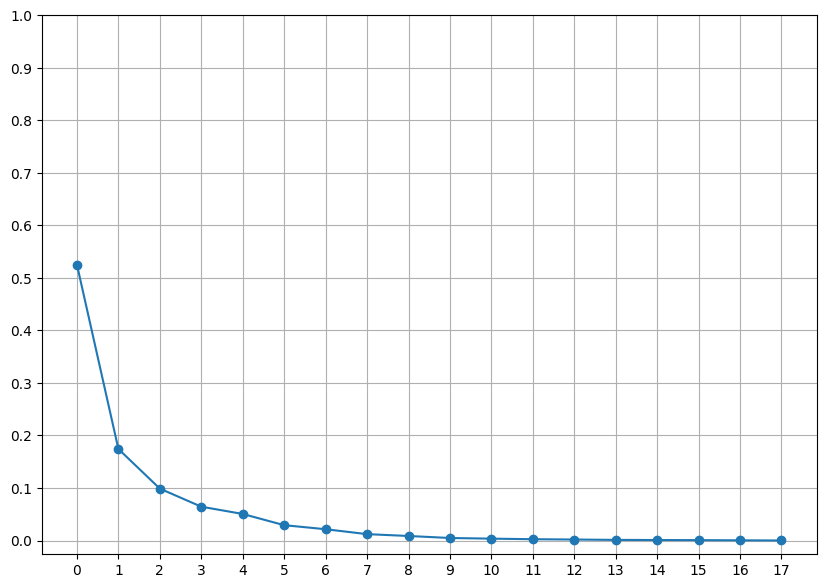

In [11]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
exp_var = pca.explained_variance_ratio_


plt.figure(figsize=(10, 7))
plt.plot(exp_var, marker="o")
plt.xticks(np.arange(len(exp_var))) 
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()

percent_90_count = np.argmax(np.cumsum(exp_var) >= 0.9) + 1

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Да, для PCA стоит нормализовать данные, чтобы привести разброс признаков к одному масштабу
(сделали ранее, при подготовке данных)

In [12]:
### YOUR CODE HERE
percent_90_count = np.argmax(np.cumsum(exp_var) >= 0.9) + 1
print("Количество компонент для объяснения 90% дисперсии:", percent_90_count)

pca = PCA(n_components=percent_90_count)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

print(X_train.shape, "→", X_train_pca.shape)
print(X_test.shape,  "→", X_test_pca.shape)

Количество компонент для объяснения 90% дисперсии: 5
(549, 18) → (549, 5)
(297, 18) → (297, 5)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [13]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    max_iter=500
)

pipe = Pipeline([
    ("pca", PCA()),
    ("log_reg", log_reg)
])

param_grid = {
    "pca__n_components": [2, 3, 4, 5, 6, 7, 8],
    "log_reg__C": [0.01, 0.1, 1, 10, 100],
    "log_reg__penalty": ["l2", "l1"]
}

grid_pca = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                      
)
grid_pca.fit(X_train, y_train)

print(grid_pca.best_params_)

model_pca = grid_pca.best_estimator_
y_pred_pca = model_pca.predict(X_test)

acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print("Accuracy (PCA):", acc_pca)
print("F1 (PCA):", f1_pca)

{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', 'pca__n_components': 8}
Accuracy (PCA): 0.6565656565656566
F1 (PCA): 0.6414330963449093


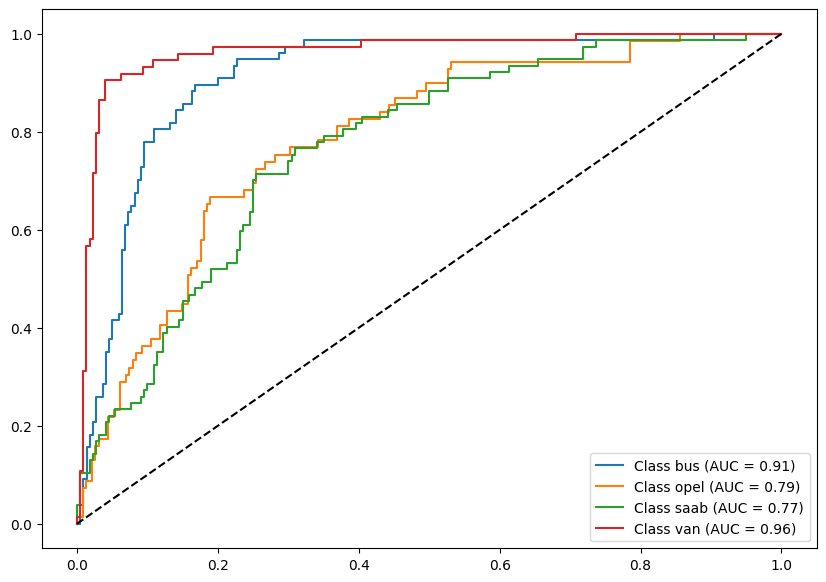

In [14]:
y_pca_proba = model_pca.predict_proba(X_test)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pca_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree = DecisionTreeClassifier()

tree_params = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],   
}

grid_tree = GridSearchCV(
    estimator=tree,
    param_grid=tree_params,
    cv=5,
)

grid_tree.fit(X_train, y_train)
print(grid_tree.best_params_)

tree_model = grid_tree.best_estimator_
y_pred_tree = tree_model.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='macro')

print("Tree Accuracy:", acc_tree)
print("Tree F1:", f1_tree)

{'max_depth': 9, 'min_samples_split': 5}
Tree Accuracy: 0.7306397306397306
Tree F1: 0.7198925255050327


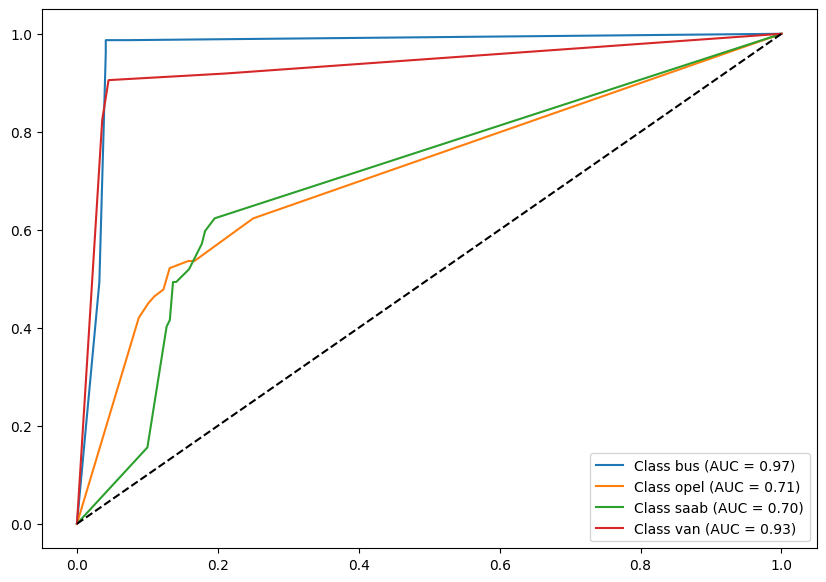

In [16]:
y_tree_proba = tree_model.predict_proba(X_test)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_tree_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [22]:
# YOUR CODE HERE
from scipy.stats import mode

n_min, n_max, step = 2, 100, 5
log_reg_models = []  
tree_models = []

for i in range(n_max):
    indexes = np.random.randint(0, X_train.shape[0], X_train.shape[0])
    X_b, y_b =  X_train[indexes], y_train[indexes]
    
    log_reg = LogisticRegression(
        **grid.best_params_,
        multi_class='multinomial',
        solver='saga',
        tol=1e-3,
        max_iter=500
    )
    log_reg.fit(X_b, y_b)
    log_reg_models.append(log_reg)
    
    tree = DecisionTreeClassifier(**grid_tree.best_params_)
    tree.fit(X_b, y_b)
    tree_models.append(tree)


In [30]:

def get_voted_preds(models, X, n):
    preds = np.array([model.predict(X) for model in models[:n]])
    
    classes = np.unique(preds)
    votes = np.zeros((len(classes), preds.shape[1]), dtype=int)
    for i, c in enumerate(classes):
        votes[i] = np.sum(preds == c, axis=0)
    
    indexes = np.argmax(votes, axis=0)
    return classes[indexes]

acc_log, f1_log, acc_tree, f1_tree = [], [], [], []
n_range = range(n_min, n_max + 1, step)
for n in n_range:
    log_preds = get_voted_preds(log_reg_models, X_test, n)
    tree_preds = get_voted_preds(tree_models, X_test, n)
    
    acc_log.append(accuracy_score(y_test, log_preds))
    f1_log.append(f1_score(y_test, log_preds, average='macro'))
    
    acc_tree.append(accuracy_score(y_test, tree_preds))
    f1_tree.append(f1_score(y_test, tree_preds, average='macro'))
    

    

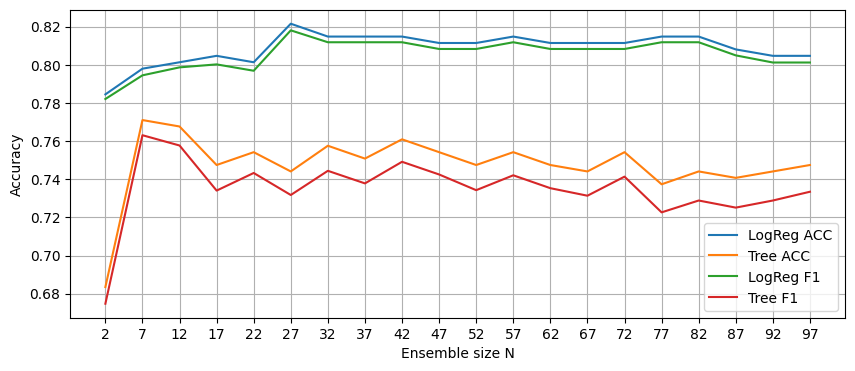

Лучшее число logreg моделей (по F1): 27
Max F1:                              0.8181
Max Accuracy:                        0.8215
----------------------------------
Лучшее число tree моделей (по F1): 7
Max F1:                            0.7631
Max Accuracy:                      0.7710


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(n_range, acc_log, label="LogReg ACC")
plt.plot(n_range, acc_tree, label="Tree ACC")
plt.plot(n_range, f1_log, label="LogReg F1")
plt.plot(n_range, f1_tree, label="Tree F1")
plt.xticks(n_range) 
plt.xlabel("Ensemble size N")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


ns = list(n_range)
best_idx = np.argmax(f1_log)
best_n_log = ns[best_idx]
print(f'Лучшее число logreg моделей (по F1): {best_n_log}')
print(f'Max F1:                              {f1_log[best_idx]:.4f}')
print(f'Max Accuracy:                        {acc_log[best_idx]:.4f}')
print("----------------------------------")
best_idx = np.argmax(f1_tree)
best_n_trees = ns[best_idx]
print(f'Лучшее число tree моделей (по F1): {best_n_trees}')
print(f'Max F1:                            {f1_tree[best_idx]:.4f}')
print(f'Max Accuracy:                      {acc_tree[best_idx]:.4f}')

Гипперпараметры для Bagging нужно подбирать отдельно, т.к. усреднение предсказаний может повлиять на выбор регуляризации и глубину дерева

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
n_range = range(n_min, n_max + 1, step)
rf_acc, rf_f1  = [], []

for n in n_range:
    rf = RandomForestClassifier(
        n_estimators=n,
        **grid_tree.best_params_
    )
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    rf_acc.append(accuracy_score(y_test, y_pred))
    rf_f1.append(f1_score(y_test, y_pred, average='macro'))

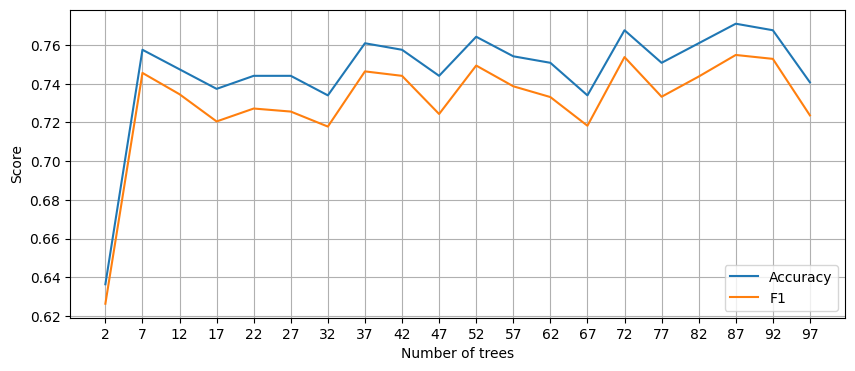

Лучшее число деревьев (по F1): 87
Max F1:                        0.7549
Max Accuracy:                  0.7710


In [51]:
plt.figure(figsize=(10, 4))
plt.plot(n_range, rf_acc, label='Accuracy')
plt.plot(n_range, rf_f1, label='F1')
plt.xticks(n_range)
plt.xlabel('Number of trees')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

ns = list(n_range)
best_idx = np.argmax(rf_f1)
best_n_trees = ns[best_idx]

print(f'Лучшее число деревьев (по F1): {best_n_trees}')
print(f'Max F1:                        {rf_f1[best_idx]:.4f}')
print(f'Max Accuracy:                  {rf_acc[best_idx]:.4f}')

RF нужно больше деревьев(в данном случае), чем Bagging. Для каждого дерева RF используются не все признаки, поэтому отдельно взятому дереву сложнее обучиться. Но такой выбор признаков снижает корреляцию между деревьями(что может быть важно для некоторых задач)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [53]:
# YOUR CODE HERE
from sklearn.utils import shuffle
import numpy as np

X_tr, y_tr = shuffle(X_train, y_train, random_state=25)

X_parts = np.array_split(X_tr, 10)
y_parts = np.array_split(y_tr, 10)

log_reg_lc = log_reg = LogisticRegression(
        **grid.best_params_,
        multi_class='multinomial',
        solver='saga',
        tol=1e-3,
        max_iter=500
    )
tree_model_lc = DecisionTreeClassifier(**grid_tree.best_params_)
rf_lc = RandomForestClassifier(n_estimators=best_n_trees, **grid_tree.best_params_)


train_sizes = []
log_acc, log_f1 = [], []
tree_acc, tree_f1 = [], []
rf_acc, rf_f1 = [], []

for i in range(1, 11):
    X_concated = np.concatenate(X_parts[:i], axis=0)
    y_concated = np.concatenate(y_parts[:i], axis=0)
    train_sizes.append(X_concated.shape[0])
    
    for model, acc_list, f1_list in [
        (log_reg_lc, log_acc, log_f1),
        (tree_model_lc, tree_acc, tree_f1),
        (rf_lc, rf_acc, rf_f1)
    ]:
        model.fit(X_concated, y_concated)
        y_pred = model.predict(X_test)
        
        acc_list.append(accuracy_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred, average='macro'))

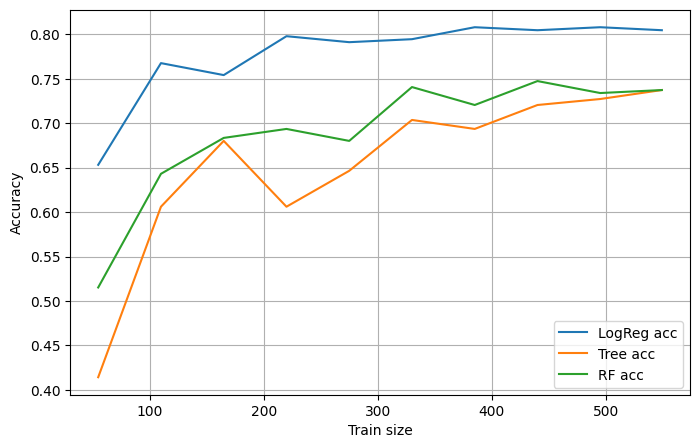

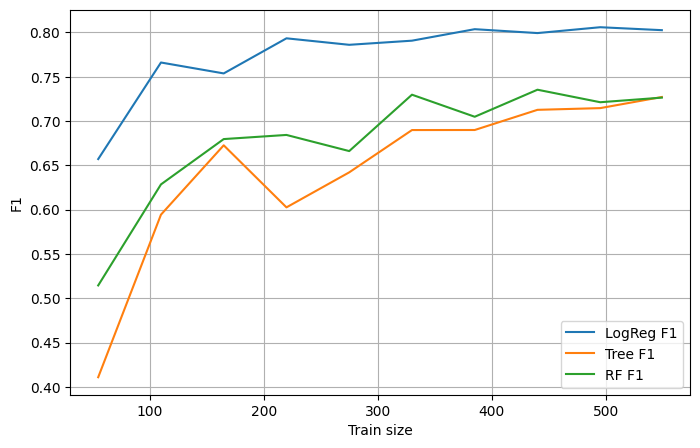

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, log_acc, label='LogReg acc')
plt.plot(train_sizes, tree_acc, label='Tree acc')
plt.plot(train_sizes, rf_acc, label='RF acc')
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, log_f1, label='LogReg F1')
plt.plot(train_sizes, tree_f1, label='Tree F1')
plt.plot(train_sizes, rf_f1, label='RF F1')
plt.xlabel('Train size')
plt.ylabel('F1')
plt.legend()
plt.grid(True)
plt.show()

С ростом выборки растет качество моделей. Когда выборка достигает 300-400 объектов качество моделей начинает расти не так заметно(графики выходят на плато).
Логистическая регрессия ведет себя лучше деревьев на любом размере выборки. Random forest дает лучшие результаты чем дерево на малых и средних размерах выборки(в районе 180 и 500 объектов их показатели становятся близки)

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
# YOUR CODE HERE
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train_enc,
    test_size=0.2,
    stratify=y_train_enc,
    random_state=25
)

dtrain = xgb.DMatrix(X_tr, label=y_tr)
dvalid = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test_enc)

params = {
    "objective": "multi:softprob",                
    "num_class": len(np.unique(y_train_enc)),    
}
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=30,
)

y_proba = model.predict(dtest)
y_pred = np.argmax(y_proba, axis=1)

acc = accuracy_score(y_test_enc, y_pred)
print("Test accuracy:", acc)
print("Оптимальное число деревьев:", model.best_iteration + 1)

[0]	train-mlogloss:1.01666	valid-mlogloss:1.15404
[1]	train-mlogloss:0.80034	valid-mlogloss:1.02361
[2]	train-mlogloss:0.63987	valid-mlogloss:0.92167
[3]	train-mlogloss:0.52699	valid-mlogloss:0.84756
[4]	train-mlogloss:0.43937	valid-mlogloss:0.78427
[5]	train-mlogloss:0.37296	valid-mlogloss:0.73338
[6]	train-mlogloss:0.31903	valid-mlogloss:0.69807
[7]	train-mlogloss:0.27519	valid-mlogloss:0.65897
[8]	train-mlogloss:0.23556	valid-mlogloss:0.63345
[9]	train-mlogloss:0.20578	valid-mlogloss:0.61637
[10]	train-mlogloss:0.18010	valid-mlogloss:0.59851
[11]	train-mlogloss:0.16072	valid-mlogloss:0.58134
[12]	train-mlogloss:0.14434	valid-mlogloss:0.57548
[13]	train-mlogloss:0.13150	valid-mlogloss:0.56333
[14]	train-mlogloss:0.11837	valid-mlogloss:0.55734
[15]	train-mlogloss:0.10777	valid-mlogloss:0.55479
[16]	train-mlogloss:0.09972	valid-mlogloss:0.55186
[17]	train-mlogloss:0.09133	valid-mlogloss:0.54883
[18]	train-mlogloss:0.08428	valid-mlogloss:0.54278
[19]	train-mlogloss:0.07874	valid-mloglos

В xgboost был передан параметр early_stopping_rounds, чтобы прекратить работу если нет улучшений метрики. По выводу метрики mlogloss видно что оптимальное значение достигается на 30ой итерации и далее не убывает.